## Lead Scoring Case Study

#### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Suppressing Warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
lead_dataset = pd.read_csv("./Leads.csv")
lead_dataset.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead_dataset.shape # (9240, 37)

(9240, 37)

### Analysis of the leads_dataset

#### Checking for null values

In [4]:
lead_dataset.info() # as output we observe that there is not null values present inside the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Cleaning for the dataset

##### 1) Handle the 'Select' values as it is present inside the many columns

In [5]:
# we can convert the 'Select' to null
lead_dataset = lead_dataset.replace('Select', np.nan)

# checking for null values present inside the data
lead_dataset.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
# check for the percentage of the null values present inside the dataset after conversio of 'Select' ---> 'null'
round(lead_dataset.isnull().sum()/len(lead_dataset.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [7]:
# we analyse that for the some of the columns present inside the dataset the null values percentage is high i.e greater.
# let remove the columns who have greater than 40% (>40%)

lead_dataset=lead_dataset.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile',
                                  'Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
                                 'Asymmetrique Profile Score'])

In [8]:
# let check again for the null percentage values inside the dataset.
round(lead_dataset.isnull().sum()/len(lead_dataset.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [9]:
# we see that the "Specialization" column has 37% of null values so we can kee it in "other category" column as it may
# possible that the customer will not fill that column as it has no specialization

lead_dataset['Specialization'] = lead_dataset['Specialization'].replace(np.nan, 'Others')

In [10]:
# we also see that "tags" column has 36% of the null or missing values.
# let see the details of that column in visual view 

# plt.figure(figsize=(10,7))
# sns.countplot(lead_dataset['Tags'])
# plt.xticks(rotation=90)

# we see that maximum values are present insidet the 'Will revert after reading the email' so we can impute that value.

lead_dataset['Tags']=lead_dataset['Tags'].replace(np.nan,'Will revert after reading the email')

In [11]:
# check for the 'What matters most to you in choosing a course' as it has 29% missing values
# we check for the percentage of the values present inside the column

round(lead_dataset['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

# so it observe that it is highly skewed column so we can remove that column.

lead_dataset=lead_dataset.drop('What matters most to you in choosing a course',axis=1)

In [12]:
# let check fot he 'What is your current occupation' as it has 29% missing values.
# check for the percentage of the values present inside the column

round(lead_dataset['What is your current occupation'].value_counts(normalize=True),2)*100

# it observe that we can impute the 'Unemployed' as it has high percentage of availability

lead_dataset['What is your current occupation']=lead_dataset['What is your current occupation'].replace(np.nan,'Unemployed')

In [13]:
# let check fot he 'Country' as it has 27% missing values.
# check for the percentage of the values present inside the column

round(lead_dataset['Country'].value_counts(normalize=True),2)*100

# it observe that we can impute the 'India' as it has high percentage of availability

lead_dataset['Country']=lead_dataset['Country'].replace(np.nan,'India')

In [14]:
# let check fot he 'City' as it has 27% missing values.
# check for the percentage of the values present inside the column

round(lead_dataset['City'].value_counts(normalize=True),2)*100

# it observe that we can impute the 'Mumbai' as it has high percentage of availability

lead_dataset['City']=lead_dataset['City'].replace(np.nan,'Mumbai')

In [15]:
# lets check again the percentage of the null values present after removing the columns and imppute the values
round(lead_dataset.isnull().sum()/len(lead_dataset.index),2)*100

# so we see that most of the missing values are remove or adjusted and the rest of the missing values have <2%
# we can remove those rows

lead_dataset.dropna(inplace = True)

### Exploratory Data Analysis(EDA)

In [16]:
# let check for the duplicate values
lead_dataset[lead_dataset.duplicated()]

# as output we see that there is no duplicate data present inside the dataset

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


#### Performing the Univariate and Bivariate analysis for the data.

In [17]:
# let check for the 'Converted' column as it contains the indication for the lead is converted(1) or not(0)
(sum(lead_dataset['Converted'])/len(lead_dataset['Converted'].index))*100

# we see the Lead conversion rate is 38% approx.

37.85541106458012

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

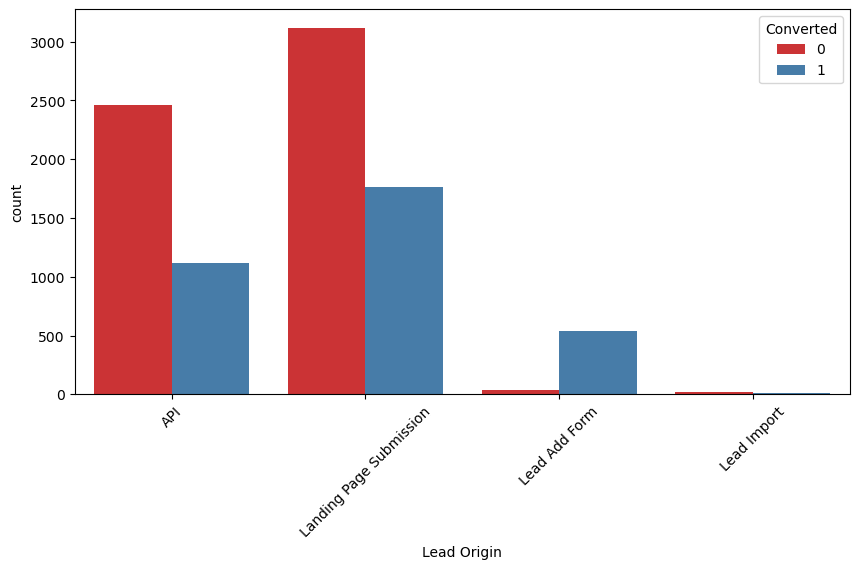

In [18]:
# analyse the 'Lead Origin' 

plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_dataset,palette='Set1')
plt.xticks(rotation = 45)

# we see the following inference from the analysys
# 1.Lead Import are very less in count.
# 2.Lead Add Form has more than 90% conversion rate but count of lead are not very high.
# To improve overall lead conversion rate, we need to focus more on improving 
# lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

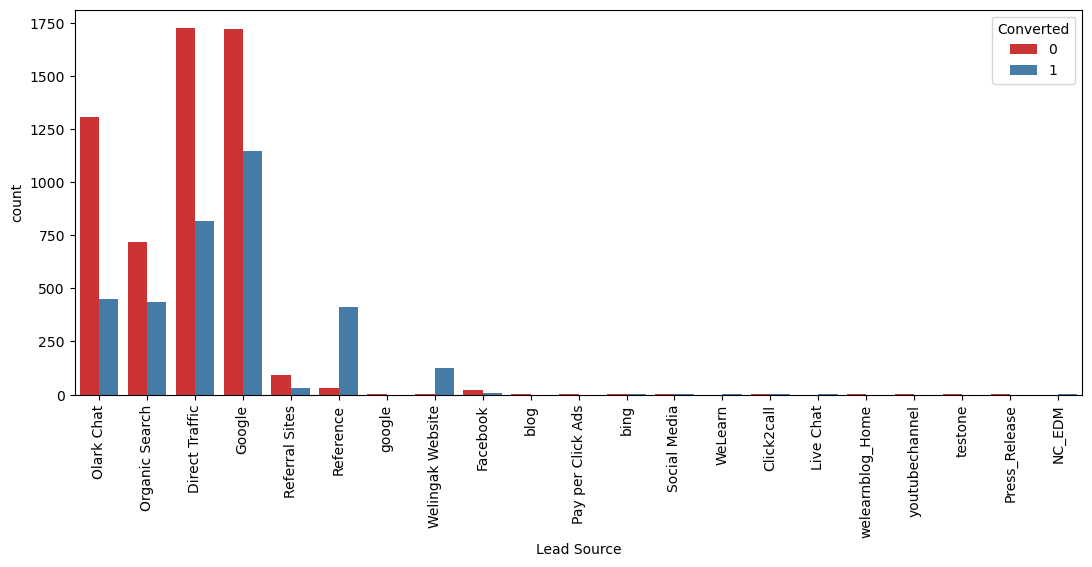

In [19]:
# analyse the 'Lead Score'

plt.figure(figsize=(13,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_dataset, palette='Set1')
plt.xticks(rotation = 90)


In [20]:
# we see the following inference from the analysys
# Need to replace 'google' with 'Google'
lead_dataset['Lead Source'] = lead_dataset['Lead Source'].replace(['google'], 'Google')

# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
lead_dataset['Lead Source'] = lead_dataset['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

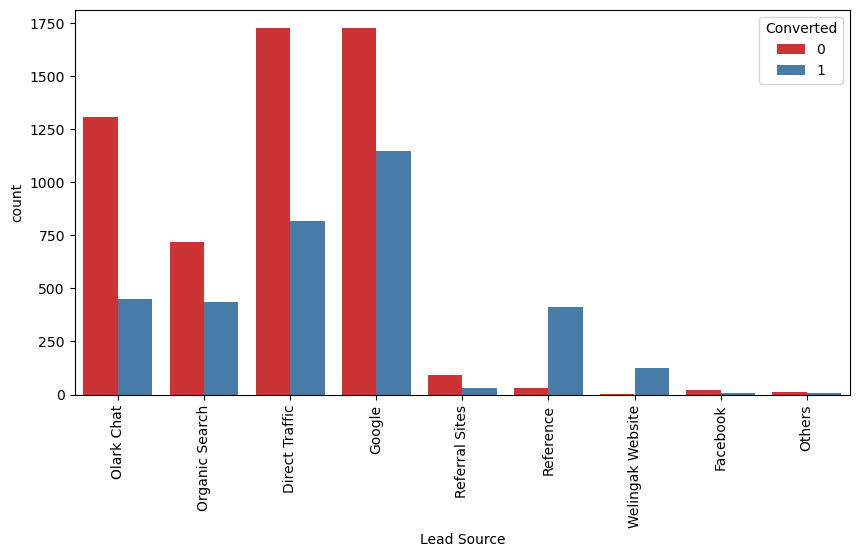

In [21]:
# on visalize the data again
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_dataset,palette='Set1')
plt.xticks(rotation = 90)

# we see the following inference
# 1."Google" and "Direct traffic" generates maximum number of leads.
# 2.Conversion Rate of reference leads and leads through "welingak website" is high

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

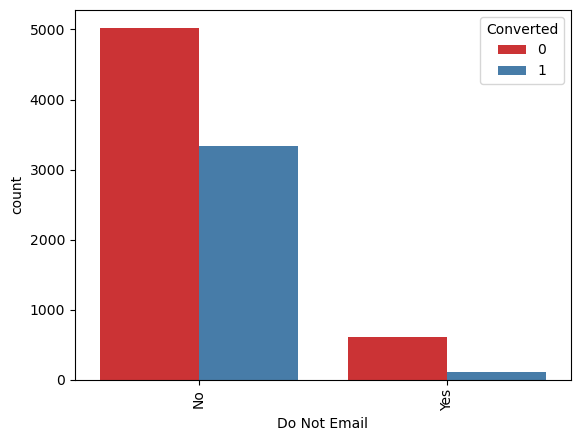

In [22]:
# analysis for the "Do not Email"

sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_dataset,palette='Set1')
plt.xticks(rotation = 90)

# following inference we get
# Most of the entries are "No"

In [23]:
# Now lets analyse the "TotalVisits" column
lead_dataset['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])


count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

<Axes: >

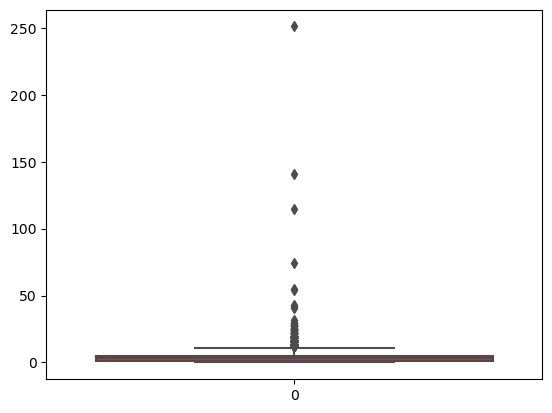

In [24]:
# we have to see the boxplot for that column as to see any outlier present inside
sns.boxplot(lead_dataset['TotalVisits'],orient='vert',palette='Set1')


In [25]:
# and we see that there are number of outliers are present inside the data so we will keep 95% values 
# to analyse the value.

percentiles = lead_dataset['TotalVisits'].quantile([0.05,0.95]).values
lead_dataset['TotalVisits'][lead_dataset['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_dataset['TotalVisits'][lead_dataset['TotalVisits'] >= percentiles[1]] = percentiles[1]

<Axes: >

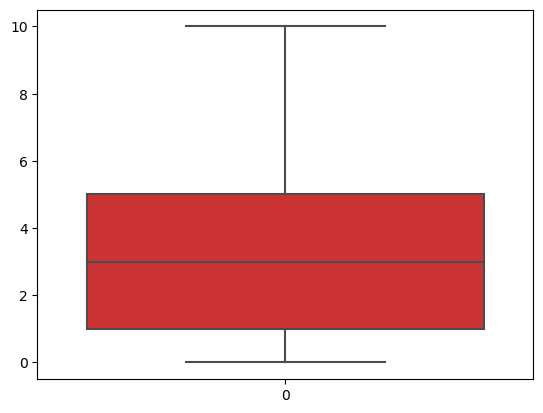

In [57]:
# checking for the outliers again

sns.boxplot(lead_dataset['TotalVisits'],orient='vert',palette='Set1')

<Axes: xlabel='Converted', ylabel='TotalVisits'>

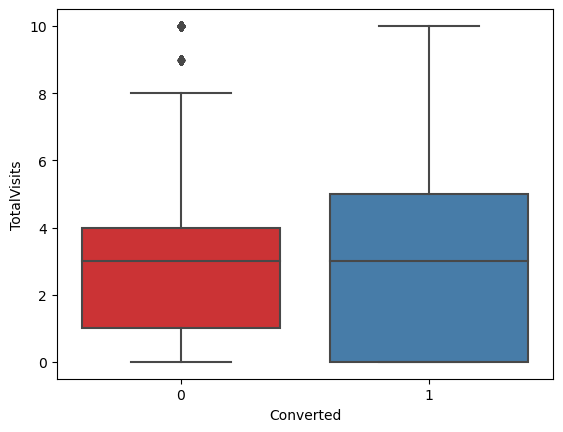

In [26]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_dataset,palette='Set1')

# here we see that median and mean for both are same so we cannot conclude any result from that variable.

In [27]:
# Analysis for the "Total Time Spent" variable
lead_dataset['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

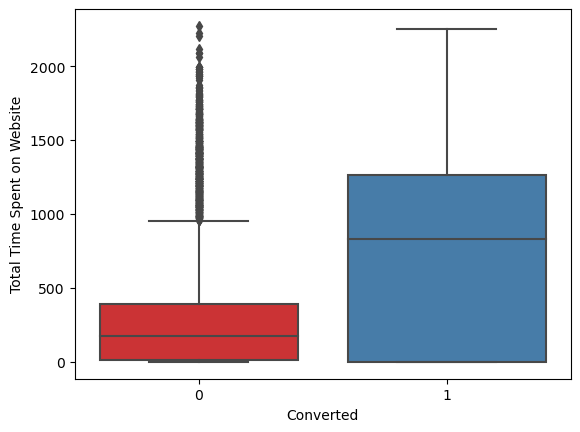

In [29]:
# lets check the outliers present inside it
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_dataset,palette='Set1')

# we see the following iference about it
# 1) Leads spending more time over website are more likely to converted. Hence website should be made more engaging
#    to made more leaders to be converted.

In [30]:
# check for 'Page Views Per Visit'
lead_dataset['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

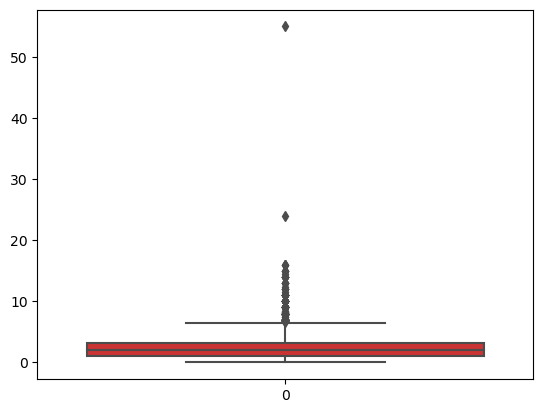

In [31]:
# lets check for any outliers present inside data
sns.boxplot(lead_dataset['Page Views Per Visit'],orient='vert',palette='Set1')

In [32]:
# we see that tehere are many outliers present inside the data so we keep 95% outliers to analyse the data
percentiles = lead_dataset['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_dataset['Page Views Per Visit'][lead_dataset['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_dataset['Page Views Per Visit'][lead_dataset['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

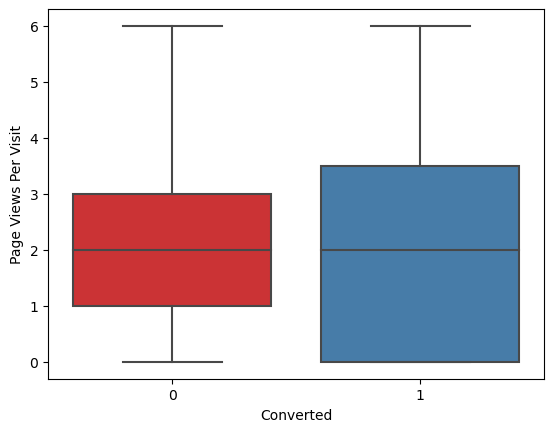

In [35]:
# Again check for the updated boxplot 
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data =lead_dataset,palette='Set1')

# as we see median and the mean is same for both converted and nconverted leads to nothin can be said for this varaible.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

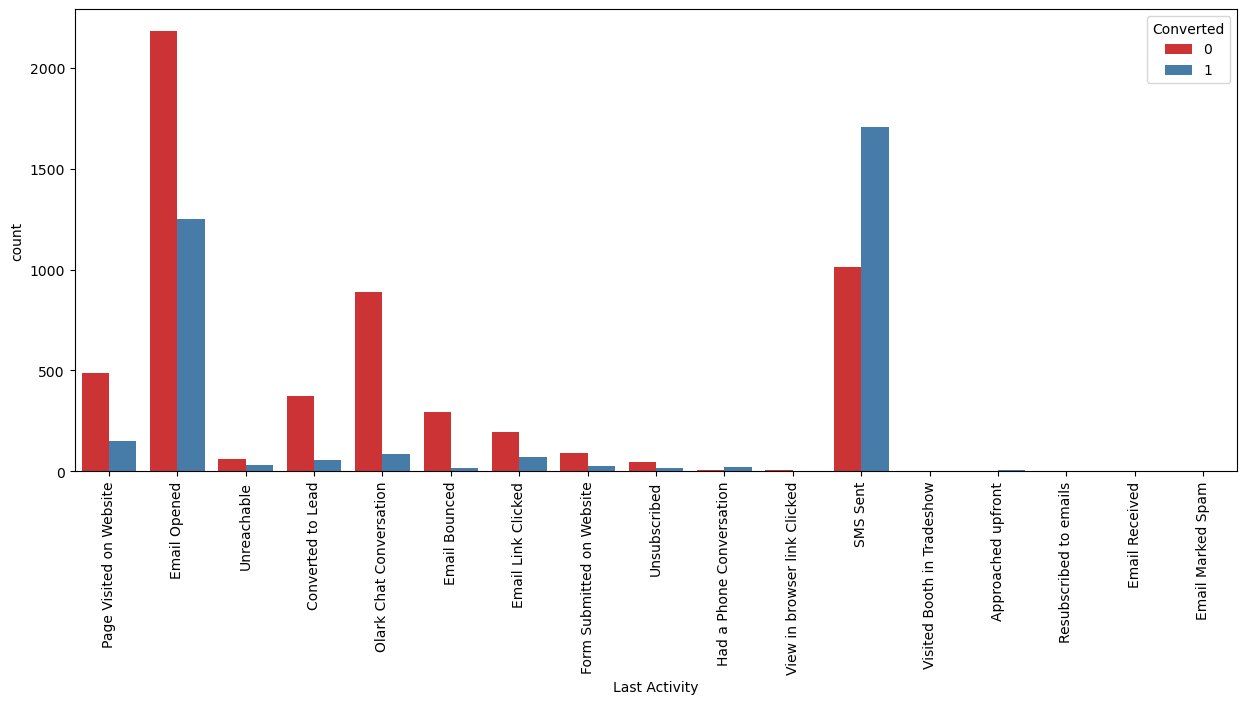

In [36]:
# Lets check for the 'Last Activity'
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_dataset,palette='Set1')
plt.xticks(rotation = 90)

In [37]:
# We can club the last activities to "Other_Activity" which are having less data.
lead_dataset['Last Activity'] = lead_dataset['Last Activity'].replace(
    ['Had a Phone Conversation', 'View in browser link Clicked', 
   'Visited Booth in Tradeshow', 'Approached upfront',
   'Resubscribed to emails','Email Received', 'Email Marked Spam'], 
'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

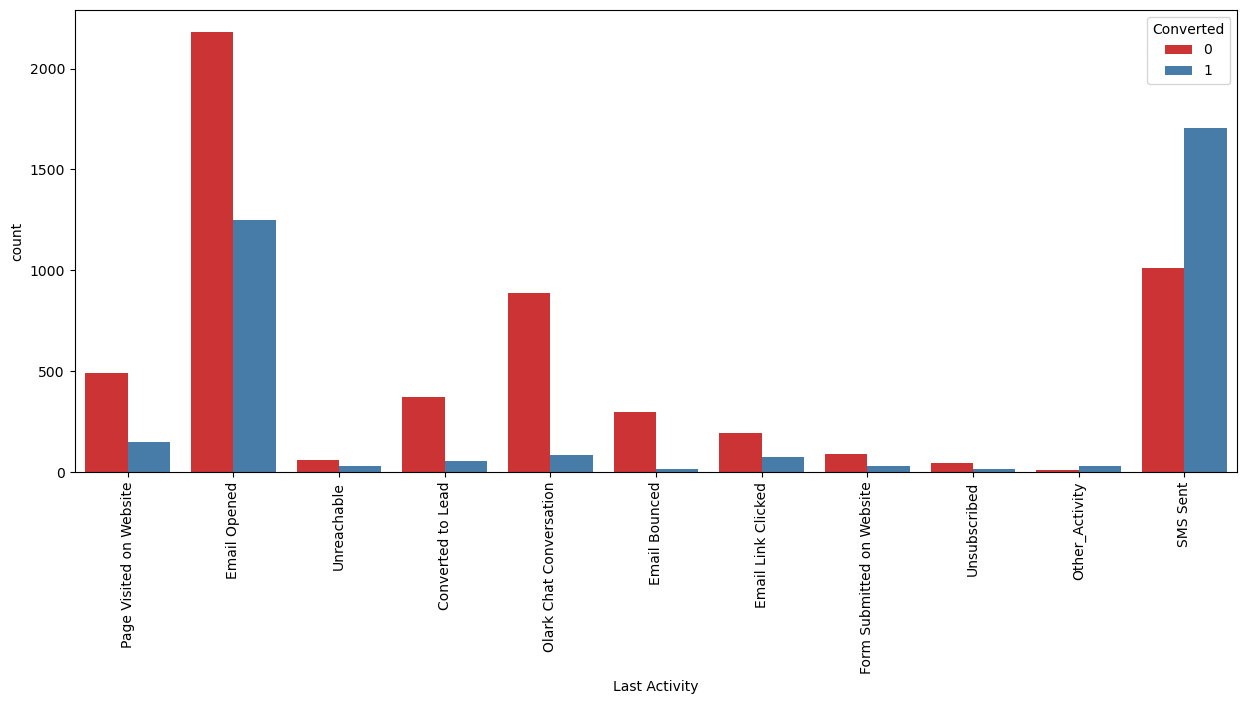

In [38]:
# visualize after combining of the columns
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_dataset,palette='Set1')
plt.xticks(rotation = 90)

# we get the following inference
# 1) Most of the lead have their Email opened as their last activity.
# 2) Conversion rate for leads with last activity as SMS Sent is almost 60%.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

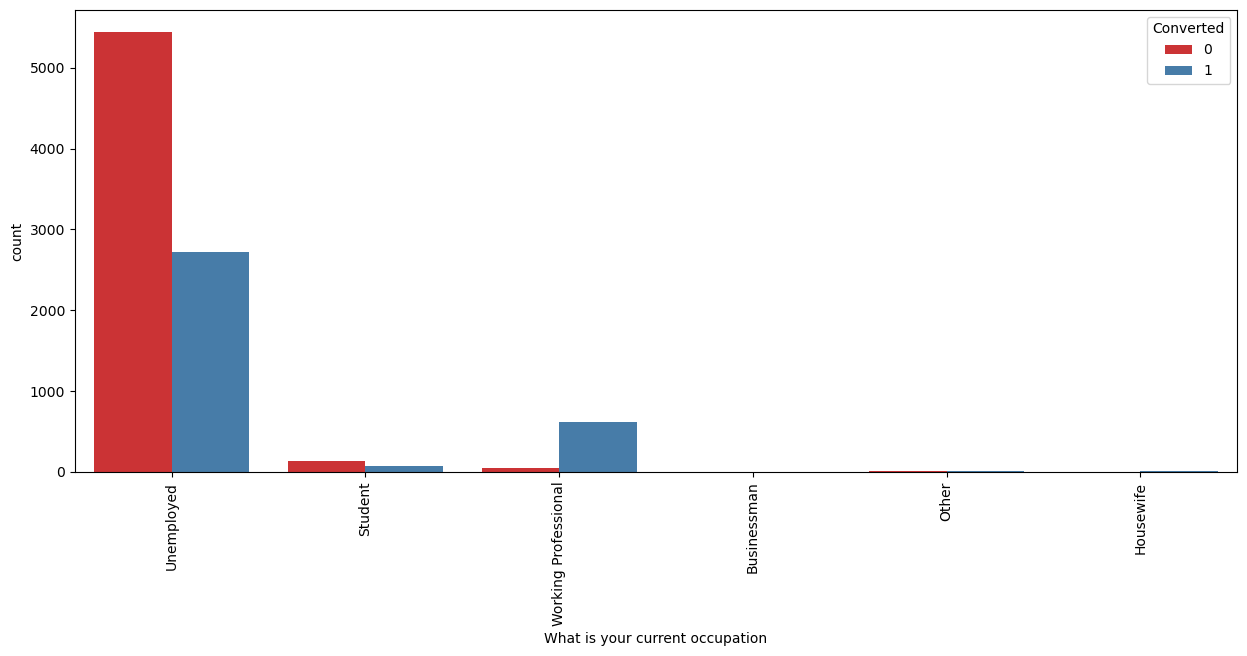

In [39]:
# let chekc for the 'What is your current occupation'
plt.figure(figsize=(15,6))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_dataset,palette='Set1')
plt.xticks(rotation = 90)

# we get the following inference
# 1) Working Professionals going for the course have high chances of joining it.
# 2) Unemployed leads are the most in numbers but has around 30-35% conversion rate

#### Based on the univariate analysis we have seen that many columns are not adding any information to the model, hence we can drop them for further analysis

In [43]:
lead_dataset = lead_dataset.drop(['Lead Number','Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

# lead_dataset.shape  ----> (9074, 14)

(9074, 14)

### Data Prepration for the lead_dataset

#### 1) Converting  binary variables (Yes/No) to 1/0

In [44]:
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_dataset[vars] = lead_dataset[vars].apply(binary_map)

#### 1) Creating Dummy variables for the categorical features:
'Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity'

In [45]:
# Creating a dummy variable for the categorical variables and dropping the first one.
dummy_dataset = pd.get_dummies(lead_dataset[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_dataset.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [46]:
# Now Concatenating the dummy_data to the lead_data dataframe
lead_dataset = pd.concat([lead_dataset, dummy_dataset], axis=1)
lead_dataset.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [47]:
# Dropping the columns for which dummies were created
lead_dataset = lead_dataset.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

#### 3) Splitting the data into train and test set



In [50]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = lead_dataset.drop(['Prospect ID','Converted'], axis=1)

# Putting target variable to y
y = lead_dataset['Converted']
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [51]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### 4) Scaling the features

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [53]:
# Checking for the Lead Conversion rate
Converted = (sum(lead_dataset['Converted'])/len(lead_dataset['Converted'].index))*100
Converted
# output -> 37.85541106458012

37.85541106458012

### Feature Selection Using RFE Method

In [57]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 20)             # running RFE with 20 variables as output so that it would be easier for analysis
rfe = rfe.fit(X_train, y_train)

In [58]:
# View columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_H

### Model Building

#### Model-1

In [59]:
# importing the required libraries
import statsmodels.api as sm

In [61]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2567.6
Date:                Sat, 16 Dec 2023   Deviance:                       5135.2
Time:                        11:50:26   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4081
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.6007      1.661      0.964      0.335      -1.654       4.855
Do Not Email                                            -1.6564      0.210     -7.881      0.000      -2.068      -1.244
Do Not Call                                             21.6137    3.3e+04      0.001      0.999   -6.47e+04    6.47e+04
Total Time Spent on Website                              1.1101      0.041     26.997      0.000       1.030       1.191
Lead Origin_Landing Page Submission                     -1.1126      0.130     -8.531      0.000      -1.368      -0.857
Lead Origin_Lead Add Form                                1.4997      0.889      1.686      0.092      -0.244       3.243
Lead Origin_Lead Import                                  0.9100      0.477      1.909      0.056      -0.024       1.844
Lead Source_Olark Chat                                   1.1030      0.125      8.854      0.000       0.859       1.347
Lead Source_Reference                                    1.8289      0.914      2.001      0.045       0.038       3.620
Lead Source_Welingak Website                             4.4013      1.147      3.838      0.000       2.154       6.649
Last Activity_Email Link Clicked                         0.4575      0.396      1.156      0.248      -0.318       1.233
Last Activity_Email Opened                               0.6642      0.185      3.598      0.000       0.302       1.026
Last Activity_Olark Chat Conversation                   -0.6190      0.227     -2.733      0.006      -1.063      -0.175
Last Activity_Other_Activity                             2.1619      0.603      3.587      0.000       0.981       3.343
Last Activity_SMS Sent                                   1.1159      0.187      5.978      0.000       0.750       1.482
Last Activity_Unreachable                                0.2990      0.509      0.588      0.557      -0.698       1.296
Last Activity_Unsubscribed                               1.3943      1.125      1.240      0.215      -0.810       3.598
Specialization_Hospitality Management                   -0.4284      0.329     -1.303      0.193      -1.073       0.216
Specialization_Others                                   -1.1435      0.127     -9.022      0.000      -1.392      -0.895
What is your current occupation_Housewife               21.7279   1.53e+04      0.001      0.999   -2.99e+04       3e+04
What is your current occupation_Student                 -0.5905      0.687     -0.859      0.390      -1.938       0.757
What is your current occupation_Unemployed              -1.0375      0.649     -1.599      0.110      -2.309       0.234
What is your current occupation_Working Professional     1

In [62]:
# Since Pvalue of 'What is your current occupation_Housewife' is very high, we can drop this column
col1 = cols.drop('What is your current occupation_Housewife')

#### Model-2

In [63]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.5
Date:                Sat, 16 Dec 2023   Deviance:                       5139.0
Time:                        11:51:26   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4078
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.0893      1.642      1.272      0.203      -1.129       5.307
Do Not Email                                            -1.6601      0.210     -7.893      0.000      -2.072      -1.248
Do Not Call                                             20.6175      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1090      0.041     26.988      0.000       1.028       1.190
Lead Origin_Landing Page Submission                     -1.1060      0.130     -8.488      0.000      -1.361      -0.851
Lead Origin_Lead Add Form                                1.5026      0.889      1.690      0.091      -0.240       3.246
Lead Origin_Lead Import                                  0.9113      0.477      1.913      0.056      -0.023       1.845
Lead Source_Olark Chat                                   1.1031      0.125      8.854      0.000       0.859       1.347
Lead Source_Reference                                    1.8312      0.914      2.004      0.045       0.041       3.622
Lead Source_Welingak Website                             4.3991      1.147      3.836      0.000       2.151       6.647
Last Activity_Email Link Clicked                         0.4630      0.396      1.170      0.242      -0.313       1.239
Last Activity_Email Opened                               0.6694      0.185      3.625      0.000       0.307       1.031
Last Activity_Olark Chat Conversation                   -0.6158      0.227     -2.716      0.007      -1.060      -0.171
Last Activity_Other_Activity                             2.1672      0.603      3.596      0.000       0.986       3.348
Last Activity_SMS Sent                                   1.1207      0.187      6.002      0.000       0.755       1.487
Last Activity_Unreachable                                0.3037      0.509      0.597      0.550      -0.693       1.301
Last Activity_Unsubscribed                               1.4012      1.124      1.246      0.213      -0.803       3.605
Specialization_Hospitality Management                   -0.4286      0.329     -1.304      0.192      -1.073       0.216
Specialization_Others                                   -1.1398      0.127     -9.000      0.000      -1.388      -0.892
What is your current occupation_Student                 -1.0879      0.638     -1.706      0.088      -2.338       0.162
What is your current occupation_Unemployed              -1.5340      0.596     -2.573      0.010      -2.703      -0.365
What is your current occupation_Working Professional     1.0951      0.624      1.754      0.079      -0.128       2.319
City_Tier II Cities                                     -0

In [64]:
# Since Pvalue of 'Last Notable Activity_Had a Phone Conversation' is very high, we can drop this column.
col1 = col1.drop('Last Notable Activity_Had a Phone Conversation')

#### Model-3

In [65]:
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.5
Date:                Sat, 16 Dec 2023   Deviance:                       5139.1
Time:                        11:52:35   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4078
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.3292      1.165      1.999      0.046       0.045       4.613
Do Not Email                                            -1.6609      0.210     -7.894      0.000      -2.073      -1.248
Do Not Call                                             20.6173      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1089      0.041     26.987      0.000       1.028       1.189
Lead Origin_Landing Page Submission                     -1.1062      0.130     -8.491      0.000      -1.362      -0.851
Lead Origin_Lead Add Form                                1.5025      0.889      1.690      0.091      -0.240       3.245
Lead Origin_Lead Import                                  0.9110      0.477      1.912      0.056      -0.023       1.845
Lead Source_Olark Chat                                   1.1026      0.125      8.852      0.000       0.858       1.347
Lead Source_Reference                                    1.8308      0.914      2.004      0.045       0.040       3.621
Lead Source_Welingak Website                             4.3992      1.147      3.836      0.000       2.152       6.647
Last Activity_Email Link Clicked                         0.4639      0.396      1.172      0.241      -0.312       1.240
Last Activity_Email Opened                               0.6702      0.185      3.631      0.000       0.308       1.032
Last Activity_Olark Chat Conversation                   -0.6148      0.227     -2.712      0.007      -1.059      -0.170
Last Activity_Other_Activity                             2.1863      0.595      3.673      0.000       1.020       3.353
Last Activity_SMS Sent                                   1.1216      0.187      6.008      0.000       0.756       1.487
Last Activity_Unreachable                                0.3045      0.509      0.599      0.549      -0.693       1.302
Last Activity_Unsubscribed                               1.4024      1.124      1.247      0.212      -0.801       3.606
Specialization_Hospitality Management                   -0.4286      0.329     -1.303      0.192      -1.073       0.216
Specialization_Others                                   -1.1401      0.127     -9.003      0.000      -1.388      -0.892
What is your current occupation_Student                 -1.0880      0.638     -1.706      0.088      -2.338       0.162
What is your current occupation_Unemployed              -1.5342      0.596     -2.573      0.010      -2.703      -0.365
What is your current occupation_Working Professional     1.0948      0.624      1.754      0.079      -0.129       2.318
City_Tier II Cities                                     -0

In [66]:
# Since Pvalue of 'What is your current occupation_Student' is very high, we can drop this column.
col1 = col1.drop('What is your current occupation_Student')

#### Model-4

In [67]:
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6319
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2571.1
Date:                Sat, 16 Dec 2023   Deviance:                       5142.1
Time:                        11:53:19   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4075
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4073      1.029      1.368      0.171      -0.609       3.423
Do Not Email                                            -1.6564      0.210     -7.882      0.000      -2.068      -1.245
Do Not Call                                             20.6024      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1097      0.041     27.014      0.000       1.029       1.190
Lead Origin_Landing Page Submission                     -1.1198      0.130     -8.611      0.000      -1.375      -0.865
Lead Origin_Lead Add Form                                1.4962      0.889      1.683      0.092      -0.247       3.239
Lead Origin_Lead Import                                  0.9041      0.477      1.896      0.058      -0.030       1.839
Lead Source_Olark Chat                                   1.0976      0.124      8.818      0.000       0.854       1.342
Lead Source_Reference                                    1.8375      0.914      2.011      0.044       0.047       3.628
Lead Source_Welingak Website                             4.4053      1.147      3.842      0.000       2.158       6.653
Last Activity_Email Link Clicked                         0.4509      0.396      1.139      0.255      -0.325       1.226
Last Activity_Email Opened                               0.6625      0.184      3.593      0.000       0.301       1.024
Last Activity_Olark Chat Conversation                   -0.6185      0.226     -2.733      0.006      -1.062      -0.175
Last Activity_Other_Activity                             2.1819      0.595      3.665      0.000       1.015       3.349
Last Activity_SMS Sent                                   1.1157      0.187      5.980      0.000       0.750       1.481
Last Activity_Unreachable                                0.2980      0.509      0.586      0.558      -0.699       1.295
Last Activity_Unsubscribed                               1.3936      1.125      1.239      0.215      -0.810       3.598
Specialization_Hospitality Management                   -0.4362      0.329     -1.327      0.184      -1.080       0.208
Specialization_Others                                   -1.1526      0.126     -9.116      0.000      -1.400      -0.905
What is your current occupation_Unemployed              -0.5963      0.214     -2.793      0.005      -1.015      -0.178
What is your current occupation_Working Professional     2.0314      0.284      7.145      0.000       1.474       2.589
City_Tier II Cities                                     -0.5654      0.456     -1.241      0.215      -1.458       0.328
Last Notable Activity_Email Bounced                     -0

In [68]:
# Since Pvalue of 'Lead Origin_Lead Add Form' is very high, we can drop this column.
col1 = col1.drop('Lead Origin_Lead Add Form')

#### Model-5

In [69]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2572.6
Date:                Sat, 16 Dec 2023   Deviance:                       5145.3
Time:                        11:53:57   Pearson chi2:                 6.40e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4072
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4243      1.028      1.385      0.166      -0.591       3.440
Do Not Email                                            -1.6588      0.210     -7.894      0.000      -2.071      -1.247
Do Not Call                                             20.5939      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1077      0.041     27.009      0.000       1.027       1.188
Lead Origin_Landing Page Submission                     -1.1386      0.130     -8.778      0.000      -1.393      -0.884
Lead Origin_Lead Import                                  0.8877      0.477      1.861      0.063      -0.047       1.823
Lead Source_Olark Chat                                   1.0910      0.124      8.783      0.000       0.848       1.334
Lead Source_Reference                                    3.3192      0.244     13.618      0.000       2.841       3.797
Lead Source_Welingak Website                             5.8929      0.731      8.062      0.000       4.460       7.325
Last Activity_Email Link Clicked                         0.4465      0.396      1.129      0.259      -0.329       1.222
Last Activity_Email Opened                               0.6636      0.184      3.603      0.000       0.303       1.025
Last Activity_Olark Chat Conversation                   -0.6247      0.226     -2.762      0.006      -1.068      -0.181
Last Activity_Other_Activity                             2.1779      0.595      3.661      0.000       1.012       3.344
Last Activity_SMS Sent                                   1.1122      0.186      5.967      0.000       0.747       1.477
Last Activity_Unreachable                                0.2952      0.509      0.580      0.562      -0.702       1.292
Last Activity_Unsubscribed                               1.3918      1.124      1.238      0.216      -0.812       3.595
Specialization_Hospitality Management                   -0.4377      0.329     -1.332      0.183      -1.082       0.207
Specialization_Others                                   -1.1650      0.126     -9.223      0.000      -1.413      -0.917
What is your current occupation_Unemployed              -0.5933      0.214     -2.778      0.005      -1.012      -0.175
What is your current occupation_Working Professional     2.0311      0.284      7.142      0.000       1.474       2.588
City_Tier II Cities                                     -0.5656      0.455     -1.242      0.214      -1.458       0.327
Last Notable Activity_Email Bounced                     -0.6504      1.142     -0.569      0.569      -2.890       1.589
Last Notable Activity_Email Link Clicked                -1

#### Checking for VIF values

In [70]:
# pvalues are not hign as of now,Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,What is your current occupation_Unemployed,34.18
22,Last Notable Activity_Email Opened,22.25
23,Last Notable Activity_Modified,19.91
26,Last Notable Activity_SMS Sent,18.17
9,Last Activity_Email Opened,9.21
12,Last Activity_SMS Sent,7.63
3,Lead Origin_Landing Page Submission,7.27
16,Specialization_Others,4.66
18,What is your current occupation_Working Profes...,3.93
21,Last Notable Activity_Email Link Clicked,3.92


In [71]:
# Dropping the column  'What is your current occupation_Unemployed' because it has high VIF
col1 = col1.drop('What is your current occupation_Unemployed')

#### Model-6

In [72]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6321
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.4
Date:                Sat, 16 Dec 2023   Deviance:                       5152.8
Time:                        11:56:17   Pearson chi2:                 6.42e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4065
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8416      1.006      0.836      0.403      -1.131       2.814
Do Not Email                                            -1.6518      0.210     -7.850      0.000      -2.064      -1.239
Do Not Call                                             20.5595      2e+04      0.001      0.999   -3.92e+04    3.93e+04
Total Time Spent on Website                              1.1077      0.041     27.021      0.000       1.027       1.188
Lead Origin_Landing Page Submission                     -1.1428      0.130     -8.804      0.000      -1.397      -0.888
Lead Origin_Lead Import                                  0.8679      0.477      1.820      0.069      -0.067       1.803
Lead Source_Olark Chat                                   1.0968      0.124      8.830      0.000       0.853       1.340
Lead Source_Reference                                    3.3310      0.243     13.683      0.000       2.854       3.808
Lead Source_Welingak Website                             5.8842      0.731      8.051      0.000       4.452       7.317
Last Activity_Email Link Clicked                         0.4563      0.397      1.150      0.250      -0.321       1.234
Last Activity_Email Opened                               0.6687      0.184      3.629      0.000       0.308       1.030
Last Activity_Olark Chat Conversation                   -0.6135      0.226     -2.715      0.007      -1.057      -0.171
Last Activity_Other_Activity                             2.1694      0.595      3.646      0.000       1.003       3.336
Last Activity_SMS Sent                                   1.1030      0.186      5.919      0.000       0.738       1.468
Last Activity_Unreachable                                0.2811      0.509      0.552      0.581      -0.716       1.279
Last Activity_Unsubscribed                               1.3749      1.124      1.223      0.221      -0.829       3.579
Specialization_Hospitality Management                   -0.4343      0.329     -1.319      0.187      -1.080       0.211
Specialization_Others                                   -1.1772      0.126     -9.306      0.000      -1.425      -0.929
What is your current occupation_Working Professional     2.6054      0.196     13.301      0.000       2.222       2.989
City_Tier II Cities                                     -0.5801      0.455     -1.274      0.203      -1.472       0.312
Last Notable Activity_Email Bounced                     -0.6472      1.143     -0.566      0.571      -2.887       1.592
Last Notable Activity_Email Link Clicked                -1.8631      1.092     -1.706      0.088      -4.003       0.277
Last Notable Activity_Email Opened                      -1

In [73]:
# Dropping the column  'Lead Origin_Lead Import' because it has high Pvalue
col1 = col1.drop('Lead Origin_Lead Import')

#### Model-7

In [74]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6322
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.9
Date:                Sat, 16 Dec 2023   Deviance:                       5155.9
Time:                        11:56:53   Pearson chi2:                 6.41e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4062
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8740      1.006      0.869      0.385      -1.097       2.845
Do Not Email                                            -1.6515      0.210     -7.851      0.000      -2.064      -1.239
Do Not Call                                             20.5451      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1005      0.041     27.024      0.000       1.021       1.180
Lead Origin_Landing Page Submission                     -1.1782      0.129     -9.165      0.000      -1.430      -0.926
Lead Source_Olark Chat                                   1.0709      0.123      8.694      0.000       0.830       1.312
Lead Source_Reference                                    3.2964      0.243     13.585      0.000       2.821       3.772
Lead Source_Welingak Website                             5.8591      0.731      8.018      0.000       4.427       7.291
Last Activity_Email Link Clicked                         0.4562      0.396      1.151      0.250      -0.321       1.233
Last Activity_Email Opened                               0.6755      0.184      3.668      0.000       0.315       1.036
Last Activity_Olark Chat Conversation                   -0.6144      0.226     -2.718      0.007      -1.057      -0.171
Last Activity_Other_Activity                             2.1682      0.594      3.649      0.000       1.004       3.333
Last Activity_SMS Sent                                   1.1116      0.186      5.970      0.000       0.747       1.476
Last Activity_Unreachable                                0.2820      0.509      0.554      0.579      -0.715       1.279
Last Activity_Unsubscribed                               1.3738      1.123      1.223      0.221      -0.828       3.576
Specialization_Hospitality Management                   -0.4369      0.329     -1.327      0.185      -1.082       0.208
Specialization_Others                                   -1.1989      0.126     -9.492      0.000      -1.447      -0.951
What is your current occupation_Working Professional     2.6058      0.196     13.308      0.000       2.222       2.990
City_Tier II Cities                                     -0.5781      0.454     -1.272      0.203      -1.469       0.313
Last Notable Activity_Email Bounced                     -0.6446      1.142     -0.564      0.573      -2.883       1.594
Last Notable Activity_Email Link Clicked                -1.8592      1.091     -1.704      0.088      -3.998       0.280
Last Notable Activity_Email Opened                      -1.6267      1.005     -1.618      0.106      -3.597       0.343
Last Notable Activity_Modified                          -1

In [75]:
# pvalues is not high so,Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,Last Notable Activity_Email Opened,11.92
24,Last Notable Activity_SMS Sent,9.94
8,Last Activity_Email Opened,9.20
11,Last Activity_SMS Sent,7.60
21,Last Notable Activity_Modified,7.52
3,Lead Origin_Landing Page Submission,7.15
15,Specialization_Others,4.64
26,Last Notable Activity_Unsubscribed,3.66
13,Last Activity_Unsubscribed,3.62
19,Last Notable Activity_Email Link Clicked,3.28


In [76]:
# Dropping the column  'Last Activity_Unsubscribed' to reduce the variables
col1 = col1.drop('Last Activity_Unsubscribed')

#### Model-8

In [77]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.5
Date:                Sat, 16 Dec 2023   Deviance:                       5157.0
Time:                        11:57:48   Pearson chi2:                 6.42e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.8811      1.005      0.877      0.381      -1.089       2.851
Do Not Email                                            -1.6342      0.210     -7.799      0.000      -2.045      -1.223
Do Not Call                                             20.5460      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1000      0.041     27.016      0.000       1.020       1.180
Lead Origin_Landing Page Submission                     -1.1774      0.129     -9.162      0.000      -1.429      -0.926
Lead Source_Olark Chat                                   1.0702      0.123      8.689      0.000       0.829       1.312
Lead Source_Reference                                    3.2958      0.243     13.587      0.000       2.820       3.771
Lead Source_Welingak Website                             5.8554      0.731      8.015      0.000       4.424       7.287
Last Activity_Email Link Clicked                         0.4457      0.396      1.125      0.261      -0.331       1.222
Last Activity_Email Opened                               0.6650      0.184      3.620      0.000       0.305       1.025
Last Activity_Olark Chat Conversation                   -0.6248      0.226     -2.770      0.006      -1.067      -0.183
Last Activity_Other_Activity                             2.1577      0.594      3.633      0.000       0.994       3.322
Last Activity_SMS Sent                                   1.1000      0.186      5.925      0.000       0.736       1.464
Last Activity_Unreachable                                0.2704      0.508      0.532      0.595      -0.726       1.267
Specialization_Hospitality Management                   -0.4375      0.329     -1.329      0.184      -1.082       0.207
Specialization_Others                                   -1.1983      0.126     -9.491      0.000      -1.446      -0.951
What is your current occupation_Working Professional     2.6042      0.196     13.309      0.000       2.221       2.988
City_Tier II Cities                                     -0.5809      0.454     -1.279      0.201      -1.471       0.309
Last Notable Activity_Email Bounced                     -0.6690      1.141     -0.586      0.558      -2.906       1.568
Last Notable Activity_Email Link Clicked                -1.8560      1.091     -1.702      0.089      -3.994       0.282
Last Notable Activity_Email Opened                      -1.6236      1.005     -1.616      0.106      -3.592       0.345
Last Notable Activity_Modified                          -1.9956      0.995     -2.006      0.045      -3.946      -0.046
Last Notable Activity_Olark Chat Conversation           -1

In [78]:
# pvalue is not high, Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Last Notable Activity_Email Opened,11.90
23,Last Notable Activity_SMS Sent,9.92
8,Last Activity_Email Opened,9.18
11,Last Activity_SMS Sent,7.58
20,Last Notable Activity_Modified,7.50
3,Lead Origin_Landing Page Submission,7.15
14,Specialization_Others,4.64
18,Last Notable Activity_Email Link Clicked,3.28
7,Last Activity_Email Link Clicked,3.17
9,Last Activity_Olark Chat Conversation,2.58


In [79]:
# Dropping the column  'Last Notable Activity_Unreachable' to reduce the variables
col1 = col1.drop('Last Notable Activity_Unreachable')

#### Model-9

In [80]:
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.5
Date:                Sat, 16 Dec 2023   Deviance:                       5157.1
Time:                        11:58:43   Pearson chi2:                 6.41e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1007      0.584      1.885      0.059      -0.044       2.245
Do Not Email                                            -1.6344      0.210     -7.798      0.000      -2.045      -1.224
Do Not Call                                             20.5465      2e+04      0.001      0.999   -3.92e+04    3.92e+04
Total Time Spent on Website                              1.1000      0.041     27.017      0.000       1.020       1.180
Lead Origin_Landing Page Submission                     -1.1778      0.129     -9.166      0.000      -1.430      -0.926
Lead Source_Olark Chat                                   1.0701      0.123      8.688      0.000       0.829       1.311
Lead Source_Reference                                    3.2950      0.243     13.585      0.000       2.820       3.770
Lead Source_Welingak Website                             5.8550      0.731      8.014      0.000       4.423       7.287
Last Activity_Email Link Clicked                         0.4465      0.396      1.127      0.260      -0.330       1.223
Last Activity_Email Opened                               0.6657      0.184      3.624      0.000       0.306       1.026
Last Activity_Olark Chat Conversation                   -0.6244      0.226     -2.767      0.006      -1.067      -0.182
Last Activity_Other_Activity                             2.0983      0.550      3.815      0.000       1.020       3.176
Last Activity_SMS Sent                                   1.1008      0.186      5.930      0.000       0.737       1.465
Last Activity_Unreachable                                0.3232      0.462      0.700      0.484      -0.582       1.228
Specialization_Hospitality Management                   -0.4378      0.329     -1.331      0.183      -1.083       0.207
Specialization_Others                                   -1.1978      0.126     -9.489      0.000      -1.445      -0.950
What is your current occupation_Working Professional     2.6052      0.196     13.316      0.000       2.222       2.989
City_Tier II Cities                                     -0.5805      0.454     -1.279      0.201      -1.470       0.309
Last Notable Activity_Email Bounced                     -0.8884      0.797     -1.115      0.265      -2.451       0.674
Last Notable Activity_Email Link Clicked                -2.0765      0.718     -2.891      0.004      -3.484      -0.669
Last Notable Activity_Email Opened                      -1.8440      0.579     -3.183      0.001      -2.979      -0.709
Last Notable Activity_Modified                          -2.2160      0.562     -3.942      0.000      -3.318      -1.114
Last Notable Activity_Olark Chat Conversation           -1

In [81]:
# pvale is not high, Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,Last Notable Activity_Email Opened,11.63
23,Last Notable Activity_SMS Sent,9.70
8,Last Activity_Email Opened,9.10
11,Last Activity_SMS Sent,7.52
20,Last Notable Activity_Modified,7.18
3,Lead Origin_Landing Page Submission,7.01
14,Specialization_Others,4.57
18,Last Notable Activity_Email Link Clicked,3.26
7,Last Activity_Email Link Clicked,3.17
9,Last Activity_Olark Chat Conversation,2.56


#### Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model-9 is our final model. We have 12 variables in our final model.

### Now we will start making Prediction on the Train set

In [82]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.192847
1012    0.143494
9226    0.246066
4750    0.879901
7987    0.736362
1281    0.767144
2880    0.097546
4971    0.969406
7536    0.853118
1248    0.700893
dtype: float64

In [83]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19284704, 0.14349358, 0.24606636, 0.87990051, 0.73636177,
       0.76714395, 0.09754585, 0.96940579, 0.85311778, 0.7008931 ])

In [84]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.192847,3009
1,0,0.143494,1012
2,0,0.246066,9226
3,1,0.879901,4750
4,1,0.736362,7987


#### Choosing an arbitrary cut-off probability point of 0.5 to find the predicted labels
#### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [85]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.192847,3009,0
1,0,0.143494,1012,0
2,0,0.246066,9226,0
3,1,0.879901,4750,1
4,1,0.736362,7987,1


#### Making the Confusion matrix

In [87]:
from sklearn import metrics

# Confusion matrix creation
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3461      444
# converted            719       1727

[[3455  450]
 [ 705 1741]]


In [88]:
# Checking the overall accuracy.
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

# output --> Accuracy : 0.8181388757675957

Accuracy : 0.8181388757675957


#### Metrics beyond simply accuracy


In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

# Sensitivity :  0.7117743254292723

Sensitivity :  0.7117743254292723


In [91]:
# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

# Specificity :  0.8847631241997439

Specificity :  0.8847631241997439


In [92]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

# False Positive Rate : 0.11523687580025609

False Positive Rate : 0.11523687580025609


In [93]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

# Positive Predictive Value : 0.7946143313555454

Positive Predictive Value : 0.7946143313555454


In [94]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

# Negative predictive value : 0.8305288461538461

Negative predictive value : 0.8305288461538461


#### We found out that our specificity was good (~88%) but our sensitivity was only 70%. 
#### Hence, this needed to be taken care of.

#### We have got sensitivity of 70% and this was mainly,
#### because of the cut-off point of 0.5 that we had arbitrarily chosen. Now,
#### this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve

### Plotting the ROC Curve

In [ ]:
# An ROC curve demonstrates several things:

# It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
# The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
# The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test

In [96]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

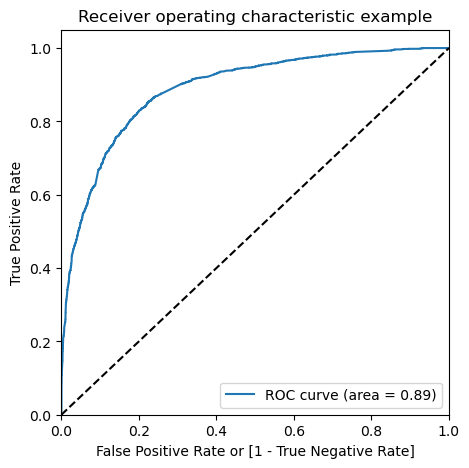

In [99]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted,
                    y_train_pred_final.Converted_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that. Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [100]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.192847,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.143494,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.246066,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.879901,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.736362,7987,1,1,1,1,1,1,1,1,1,0,0


In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.602110  0.973017  0.369782
0.2   0.2  0.759408  0.913737  0.662740
0.3   0.3  0.805857  0.850368  0.777977
0.4   0.4  0.814675  0.781276  0.835595
0.5   0.5  0.818139  0.711774  0.884763
0.6   0.6  0.802393  0.606705  0.924968
0.7   0.7  0.787278  0.529845  0.948528
0.8   0.8  0.767123  0.441946  0.970807
0.9   0.9  0.726500  0.309894  0.987452


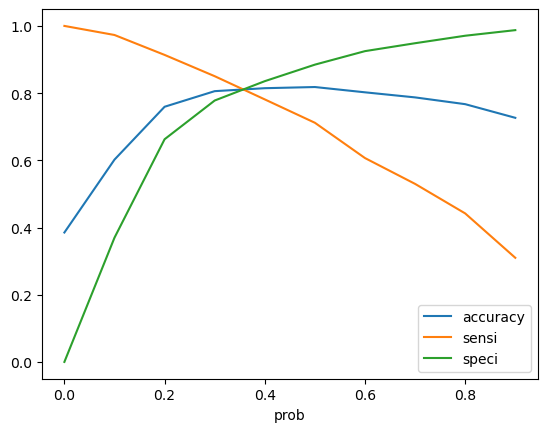

In [102]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

# From the curve above, 0.34 is the optimum point to take it as a cutoff probability

In [103]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

### Assigning Lead Score Dataset to the Training data

In [104]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.192847,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.143494,1012,0,1,1,0,0,0,0,0,0,0,0,0,14
2,0,0.246066,9226,0,1,1,1,0,0,0,0,0,0,0,0,25
3,1,0.879901,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.736362,7987,1,1,1,1,1,1,1,1,1,0,0,1,74


### Model Evaluation

In [105]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

# Accuracy : 0.8110533774208786

Accuracy : 0.8110533774208786


In [106]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3132,  773],
       [ 427, 2019]], dtype=int64)

In [107]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [109]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

# Sensitivity :  0.8254292722812756

Sensitivity :  0.8254292722812756


In [110]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

# Specificity : 0.8020486555697823

Specificity : 0.8020486555697823


In [111]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

# False Positive rate :  0.19795134443021767

False Positive rate :  0.19795134443021767


In [112]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

# Positive Predictive Value : 0.7231375358166189

Positive Predictive Value : 0.7231375358166189


In [114]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

# Negative Predictive Value :  0.8800224782242203

Negative Predictive Value :  0.8800224782242203


### Precision Recall

#### Precision = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
#### Recall = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.

### Making predictions on the test set

#### Scaling the test data

In [115]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [116]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col1]
X_test.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,...,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,0,0,-0.600595,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1490,0,0,1.887326,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7936,0,0,-0.752879,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4216,0,0,-0.888650,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3830,0,0,-0.587751,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [117]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.126088
1490    0.968507
7936    0.108756
4216    0.866217
3830    0.129897
1800    0.628486
6507    0.369732
4821    0.298090
4223    0.922821
4714    0.246066
dtype: float64

In [118]:
# Converting y_test_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [119]:
# Let's check
y_pred_1.head()

,0
3271,0.126088
1490,0.968507
7936,0.108756
4216,0.866217
3830,0.129897


In [122]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.126088
1,1,1490,0.968507
2,0,7936,0.108756
3,1,4216,0.866217
4,0,3830,0.129897


In [124]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])

# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.126088
1,1490,1,0.968507
2,7936,0,0.108756
3,4216,1,0.866217
4,3830,0,0.129897


In [125]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.34 else 0)

In [126]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

# Accuracy : 0.8016893132574366

Accuracy : 0.8016893132574366


In [127]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1385,  349],
       [ 191,  798]], dtype=int64)

In [128]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [129]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

# Sensitivity : 0.8068756319514662

Sensitivity : 0.8068756319514662


In [130]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

# Specificity : 0.7987312572087658

Specificity : 0.7987312572087658


#### Assigning Lead Score to the Testing data

In [131]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3271,0,0.126088,0,13
1,1490,1,0.968507,1,97
2,7936,0,0.108756,0,11
3,4216,1,0.866217,1,87
4,3830,0,0.129897,0,13


### Final Observations

#### Accuracy : 80.4 %
#### Sensitivity : 80.4 %
#### Specificity : 80.5 %

#### Train Data

##### Accuracy : 81.0 %
##### Sensitivity : 81.7 %
##### Specificity : 80.6 %

#### Test Data

##### Accuracy : 80.4 %
##### Sensitivity : 80.4 %
##### Specificity : 80.5 %

#### Finding out the leads which should be contacted

In [133]:
# The customers which should be contacted are the customers 
# whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.

hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

# 379 rows × 5 columns
# So there are 379 leads which can be contacted and have a high chance of getting converted

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
1,1490,1,0.968507,1,97
3,4216,1,0.866217,1,87
8,4223,1,0.922821,1,92
16,1946,1,0.930766,1,93
21,2461,1,0.993576,1,99
...,...,...,...,...,...
2694,1566,1,0.946698,1,95
2699,6461,1,0.965536,1,97
2703,5741,1,0.918594,1,92
2715,6299,1,0.884533,1,88


### Some Important parameters

In [134]:
res.params.sort_values(ascending=False)

Do Not Call                                             20.546515
Lead Source_Welingak Website                             5.855007
Lead Source_Reference                                    3.295021
What is your current occupation_Working Professional     2.605206
Last Activity_Other_Activity                             2.098283
Last Activity_SMS Sent                                   1.100830
const                                                    1.100730
Total Time Spent on Website                              1.100024
Lead Source_Olark Chat                                   1.070087
Last Activity_Email Opened                               0.665729
Last Activity_Email Link Clicked                         0.446511
Last Activity_Unreachable                                0.323210
Last Notable Activity_Unsubscribed                       0.201656
Specialization_Hospitality Management                   -0.437790
City_Tier II Cities                                     -0.580546
Last Activ

#### 1) The company should make calls to the leads coming from the lead sources "Welingak Websites" and "Reference" as these are more likely to get converted.
#### 2) The company should make calls to the leads who are the "working professionals" as they are more likely to get converted.
#### 3) The company should make calls to the leads who spent "more time on the websites" as these are more likely to get converted.
#### 4) The company should make calls to the leads coming from the lead sources "Olark Chat" as these are more likely to get converted.
#### 5) The company should make calls to the leads whose last activity was SMS Sent as they are more likely to get converted.
#### 6) The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.
#### 7) The company should not make calls to the leads whose lead origin is "Landing Page Submission" as they are not likely to get converted.
